Gaurav Dawar

19BAI10174

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Pre processing 

In [4]:
train_data=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_data=ImageDataGenerator(rescale=1./255)

In [6]:
x_train=train_data.flow_from_directory(r"/home/DELL/Downloads/dataset_hand_digit/traindata",target_size=(96,96),batch_size=10,class_mode="categorical")
x_test=test_data.flow_from_directory(r"/home/DELL/Downloads/dataset_hand_digit/testdata",target_size=(96,96),batch_size=10,class_mode="categorical")

Found 160 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [7]:
x_train.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [8]:
x_test.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

model formation

In [10]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(96,96,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=150,activation="relu"))
model.add(Dense(units=10,activation="softmax"))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 70688)             0         
                                                                 
 dense (Dense)               (None, 150)               10603350  
                                                                 
 dense_1 (Dense)             (None, 10)                1510      
                                                                 
Total params: 10,605,756
Trainable params: 10,605,756
Non-trainable params: 0
__________________________________________

In [12]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

Model training

In [13]:
model.fit(x_train,steps_per_epoch=16,epochs=10,validation_steps=5,validation_data=x_test)

Epoch 1/10
16/16 [==============================] - 2s 118ms/step - loss: 10.2316 - accuracy: 0.0812 - val_loss: 2.9625 - val_accuracy: 0.1000
Epoch 2/10
16/16 [==============================] - 2s 115ms/step - loss: 2.5175 - accuracy: 0.1125 - val_loss: 2.3050 - val_accuracy: 0.1400
Epoch 3/10
16/16 [==============================] - 2s 107ms/step - loss: 2.2671 - accuracy: 0.1375 - val_loss: 2.2060 - val_accuracy: 0.2000
Epoch 4/10
16/16 [==============================] - 2s 109ms/step - loss: 2.1168 - accuracy: 0.2937 - val_loss: 2.1036 - val_accuracy: 0.2400
Epoch 5/10
16/16 [==============================] - 2s 108ms/step - loss: 1.9604 - accuracy: 0.3313 - val_loss: 2.0348 - val_accuracy: 0.2200
Epoch 6/10
16/16 [==============================] - 2s 108ms/step - loss: 1.8230 - accuracy: 0.3812 - val_loss: 1.8967 - val_accuracy: 0.3600
Epoch 7/10
16/16 [==============================] - 2s 102ms/step - loss: 1.6571 - accuracy: 0.4500 - val_loss: 1.7962 - val_accuracy: 0.3800
Epoch

In [26]:
model.save("assignment3.h5")

testing

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [28]:
model=load_model("assignment3.h5")

In [29]:
img=image.load_img(r"/home/harshit/Downloads/dataset_hand_digit/sample1.png",target_size=(96,96))
s1=image.img_to_array(img)
s1=np.expand_dims(s1,axis=0)
s1.shape

(1, 96, 96, 3)

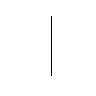

In [30]:
index=[0,1,2,3,4,5,6,7,8,9]
img

In [31]:
result=index[np.argmax(model.predict(s1),axis=1)[0]]
print("Result(Prediction):",result)

Result(Prediction): 1


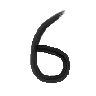

In [32]:
img=image.load_img("/home/harshit/Downloads/dataset_hand_digit/sample6.png",target_size=(96,96))
s2=image.img_to_array(img)
s2=np.expand_dims(s2,axis=0)
#s2.shape
img

In [33]:
result=index[np.argmax(model.predict(s2),axis=1)[0]]
print("Result(Prediction):",result)

Result(Prediction): 6
